1.

In [4]:
import numpy as np

# Datos
m = np.array([10, 4, 5, 6], dtype=float)  # masas
mu = np.array([0.25, 0.3, 0.2], dtype=float)  # coeficientes de fricción
g = 9.81
theta = np.radians(45)
s = np.sin(theta)
c = np.cos(theta)

# Vector de constantes (lado derecho de las ecuaciones)
b = np.zeros(4)
b[0] = m[0] * g * (s - mu[0] * c)
b[1] = m[1] * g * (s - mu[1] * c)
b[2] = m[2] * g * (s - mu[2] * c)
b[3] = -m[3] * g

# Matriz del sistema Ax = b, con x = [a, T1, T2, T3]
A = np.array([
    [m[0], 1,  0,  0],    # Eq 1
    [m[1], -1, 1,  0],    # Eq 2
    [m[2], 0, -1, 1],     # Eq 3
    [m[3], 0,  0, -1]     # Eq 4
], dtype=float)

# Resolver sistema
x = np.linalg.solve(A, b)

# Resultados
a, T1, T2, T3 = x
print(f"Aceleración del sistema: a = {a:.4f} m/s^2")
print(f"Tensión T1: {T1:.4f} N")
print(f"Tensión T2: {T2:.4f} N")
print(f"Tensión T3: {T3:.4f} N")


Aceleración del sistema: a = 1.6134 m/s^2
Tensión T1: 35.8914 N
Tensión T2: 48.8606 N
Tensión T3: 68.5404 N


2.

In [3]:
import numpy as np

# Matriz A con 6 variables
A = np.array([
    [1, -1, -1,  0,  0,  0],     # nodo 2
    [0,  1,  0, -1, -1,  0],     # nodo 3
    [0,  0,  1,  1,  1, -1],     # nodo 5
    [35, 30,  0,  0, 23,  5],    # malla principal (con i45 en lugar de i34)
    [ 0, 30, -10, 7,  0,  0],    # malla 2
    [ 0,  0,  0,  0,  1, -1]     # i45 = i56
], dtype=float)

# Vector b
b = np.array([0, 0, 0, 190, 0, 0], dtype=float)

# Resolución del sistema
sol = np.linalg.solve(A, b)

# Mostrar resultados
variables = ['i12', 'i23', 'i25', 'i35', 'i45', 'i56']
for var, val in zip(variables, sol):
    print(f'{var} = {val:.4f} A')


i12 = 2.5727 A
i23 = 0.9306 A
i25 = 1.6422 A
i35 = -1.6422 A
i45 = 2.5727 A
i56 = 2.5727 A


3.

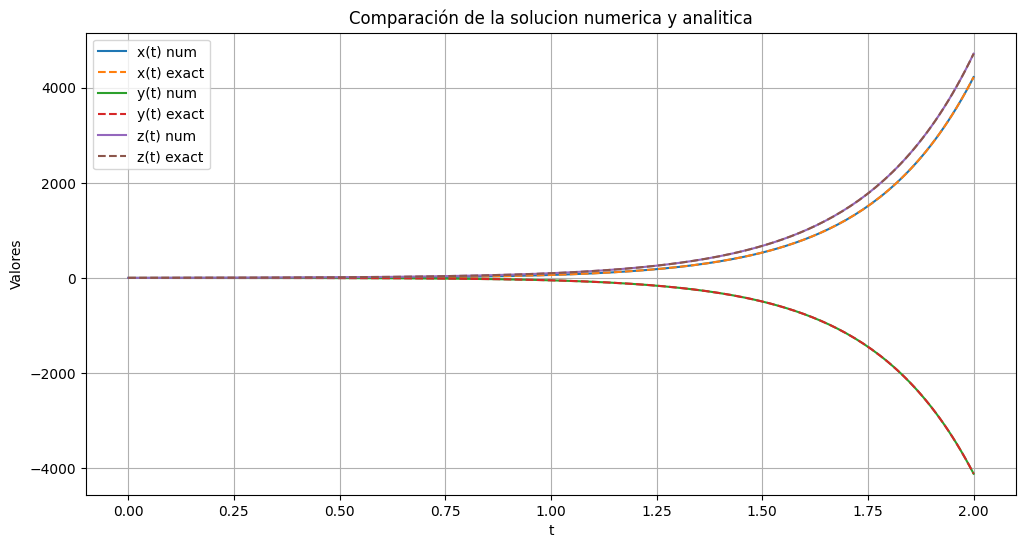

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Matriz A y condición inicial
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])
r0 = np.array([1, 1, 2])

# Diagonalización
eigvals, U = np.linalg.eig(A)
D = np.diag(eigvals)
U_inv = np.linalg.inv(U)

# Definimos solución exacta: r(t) = U e^{Dt} U^{-1} r(0)
def r_t(t):
    eDt = np.diag(np.exp(eigvals * t))
    return U @ eDt @ U_inv @ r0

# Solucion analítica simbólica para comparación
def exact_solution(t):
    e2t = np.exp(2*t)
    e2t2 = np.exp(2*t)**2
    x0, y0, z0 = r0
    x = 0.5*(x0*(e2t*(1 + e2t - 2*t)) + y0*(-2*t*e2t) + z0*(e2t*(-1 + e2t)))
    y = 0.5*(-x0*e2t*(-1 + e2t - 2*t) + y0*2*(t+1)*e2t - z0*e2t*(-1 + e2t))
    z = 0.5*(x0*e2t*(-1 + e2t + 2*t) + y0*2*t*e2t + z0*e2t*(1 + e2t))
    return np.array([x, y, z])

# Tiempo
t_vals = np.linspace(0, 2, 200)
r_numeric = np.array([r_t(t) for t in t_vals])
r_exact = np.array([exact_solution(t) for t in t_vals])

# Graficar
labels = ['x(t)', 'y(t)', 'z(t)']
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(t_vals, r_numeric[:, i], label=f'{labels[i]} num', linestyle='-')
    plt.plot(t_vals, r_exact[:, i], label=f'{labels[i]} exact', linestyle='--')
plt.legend()
plt.xlabel('t')
plt.ylabel('Valores')
plt.title('Comparación de la solucion numerica y analitica')
plt.grid(True)
plt.show()


4.

In [5]:
import numpy as np

# Constantes fisicas
hbar = 1.055e-34      # J·s
gamma = 2             # razon giromagnetica
B = 1e-4              # campo magnetico en teslas (1 gauss)

# Matriz del Hamiltoniano en base de espin 1/2
H = -gamma * hbar * B / 2 * np.array([[1, 0],
                                      [0, -1]])

print("Hamiltoniano H:\n", H)

# Verificar que H es hermitica
is_hermitian = np.allclose(H, H.conj().T)
print("\n¿Es H hermitica?:", is_hermitian)

# Calcular autovalores y autovectores
E, vecs = np.linalg.eigh(H)  # eigh garantiza la hermiticidad a probar
print("\nNiveles de energia (Los autovalores):\n", E)
print("\nAutovectores (columnas):\n", vecs)

# Verificar normalización de autovectores
for i in range(2):
    norm = np.linalg.norm(vecs[:, i])
    print(f"\nNorma del autovector {i+1}: {norm:.2f} ", "Normalizado" if np.isclose(norm, 1) else "No normalizado")

Hamiltoniano H:
 [[-1.055e-38 -0.000e+00]
 [-0.000e+00  1.055e-38]]

¿Es H hermitica?: True

Niveles de energia (Los autovalores):
 [-1.055e-38  1.055e-38]

Autovectores (columnas):
 [[1. 0.]
 [0. 1.]]

Norma del autovector 1: 1.00  Normalizado

Norma del autovector 2: 1.00  Normalizado


5.

In [8]:
import numpy as np
from scipy.linalg import eigh

def calcular_frecuencias_adimensionales():
    """
    Calcula los valores propios adimensionales del sistema masa-resorte.
    Las frecuencias obtenidas son:
        ω_i = sqrt(lambda_i * (k/m))
    """
    # Matriz de rigidez (todas con constante k, factor comun)
    K = np.array([
        [ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]
    ])

    # Matriz de masa relativa (con m factorizado fuera)
    M = np.diag([1, 3, 2])

    # Resolver problema de autovalores: K v = lambda M v
    valores_propios, modos = eigh(K, M)

    return valores_propios, modos

# Ejecutar
lambdas, modos = calcular_frecuencias_adimensionales()

print("Frecuencias en función de sqrt(k/m):")
for i, lam in enumerate(lambdas):
    print(f"ω_{i+1} = sqrt({lam:.4f} * k/m)")

print("\nModos normales (columnas):")
for i in range(modos.shape[1]):
    print(f"\nModo {i+1}:")
    for j in range(modos.shape[0]):
        print(f"  Masa {j+1}: {modos[j, i]:.4f}")


Frecuencias en función de sqrt(k/m):
ω_1 = sqrt(0.2528 * k/m)
ω_2 = sqrt(1.1809 * k/m)
ω_3 = sqrt(2.2329 * k/m)

Modos normales (columnas):

Modo 1:
  Masa 1: -0.2785
  Masa 2: -0.4866
  Masa 3: -0.3256

Modo 2:
  Masa 1: -0.2746
  Masa 2: -0.2249
  Masa 3: 0.6216

Modo 3:
  Masa 1: -0.9203
  Masa 2: 0.2144
  Masa 3: -0.0869
